In [90]:
import matplotlib.pyplot as plt
import matplotlib.image as misc
import numpy as np
import network_module as nm


def init_train(src):
    global train
    global img
    def loadimage(src):
        print '  loading image:', src
        img=misc.imread(src)
        # loaded data is already normalized to [0,1]
        return img

    def settrain(img):
        train_data = np.dstack(np.meshgrid(np.arange(img.shape[0]), np.arange(img.shape[1])))\
                       .reshape(-1, 2).astype(float)
        # train_data[:, 0] /= img.shape[0]
        # train_data[:, 1] /= img.shape[1]
        # train_label = img.reshape(-1, 3)
        train_label = np.ones_like(img.reshape(-1, 3))
        return (train_data, train_label)
    
    img = loadimage(src)
    train = settrain(img)
    return img


#########################
print 'Initializing trainset...'
init_train('g.jpg')
#########################


#########################
print 'Constructing network...'
# NETWORK DEFINITION
nn = nm.network(in_shape=train[0][0].shape, criterion='MSE')
nn.add_full(100, sharp=True)
nn.add_activation('relu')
nn.add_full(100, sharp=True)
nn.add_activation('relu')

nn.add_full(3)

#########################
print nn

result = []


def print_test():
    %matplotlib inline
    from IPython import display
    plt.imshow(nn.get_output(train[0]).reshape(img.shape))
    plt.show()

def train_net():
    nn.SGD(train_policy=nn.fix_epoch,
           training_set=train,
           batch=1, rate=0.0001, epoch_call_back=print_test, epoch=15)


def loadnetwork(network_source):
    global nn
    nn = nm.load(network_source)

    
def imshow(im, cmap='Greys_r', interpol='None'):

    if len(im.shape) == 3:
        for i, x in enumerate(im, 1):
            plt.subplot(1, len(im), i)
            plt.imshow(x.squeeze(), cmap=cmap, interpolation=interpol)
            plt.gca().xaxis.set_major_locator(plt.NullLocator())
    if len(im.shape) == 4:
        for irow, xrow in enumerate(im, 0):
            for icol, x in enumerate(xrow, 1):
                print '\r  ', len(im), len(xrow), irow * len(xrow) + icol
                plt.subplot(len(im), len(xrow), irow * len(xrow) + icol)
                plt.imshow(x.squeeze(), cmap=cmap, interpolation=interpol)
                plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.show()
    return im.shape


def visualise_layer(lay_ind=4, top=9, iterations=1000):
    test = nn.grad_ascent(lay_ind, train[0], top, iterations)\
             .reshape((top,) + nn[lay_ind].shape + (28, 28))
    test = np.concatenate((test, test.mean(axis=0)[np.newaxis, :]), axis=0)
    return test


def max_act(lay_ind, top=9):
    return test[0][nn.max_act(lay_ind, test[0], top)].squeeze()



Initializing trainset...
  loading image: g.jpg
Constructing network...
Network ID: 140680165473872
Network layout:
------------------------------
	INPUT  (2,)
	   |
	   |
	  |1|
  fully connected  (100,)   ->   weights + bias: (100, 2) + (100,)
	   |
	   |
	  |2|
  activation (100,)   ->   type: relu
	   |
	   |
	  |3|
  fully connected  (100,)   ->   weights + bias: (100, 100) + (100,)
	   |
	   |
	  |4|
  activation (100,)   ->   type: relu
	   |
	   |
	  |5|
  fully connected  (3,)   ->   weights + bias: (3, 100) + (3,)
	   |
	   |
	  |6|
  	OUTPUT  (3,)   ->   CRITERION  (MSE)
------------------------------


   batch: 2116 of 2116

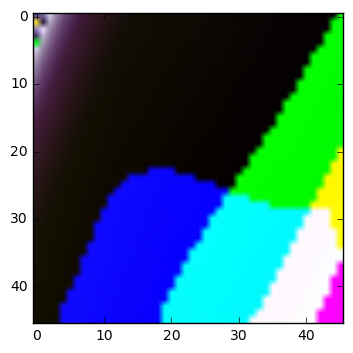

   batch: 2116 of 2116

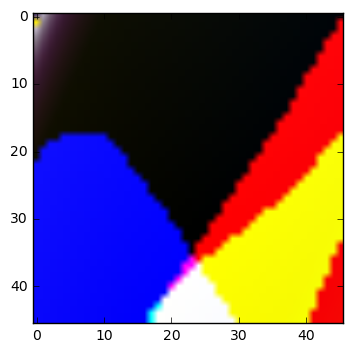

   batch: 2116 of 2116

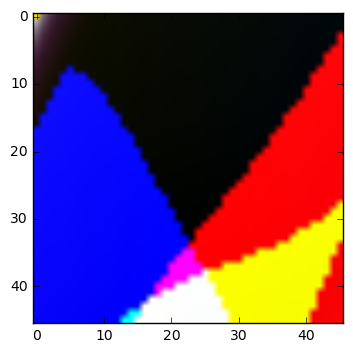

   batch: 2116 of 2116

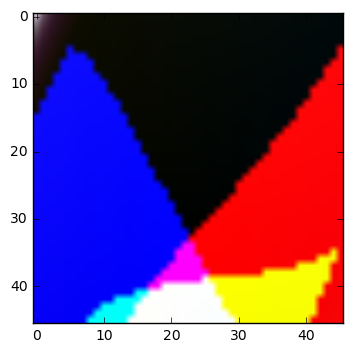

   batch: 2116 of 2116

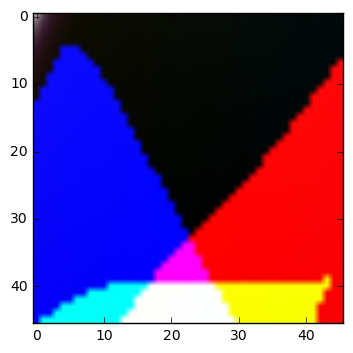

   batch: 2116 of 2116

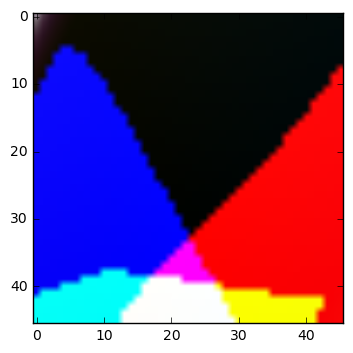

   batch: 2116 of 2116

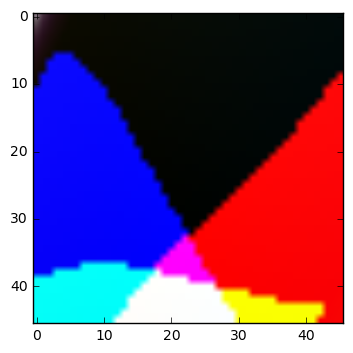

   batch: 2116 of 2116

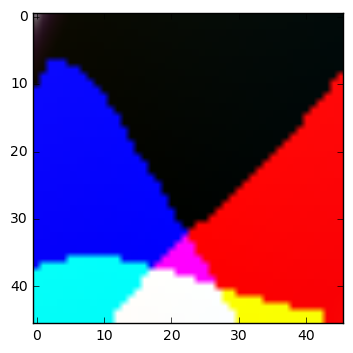

   batch: 2116 of 2116

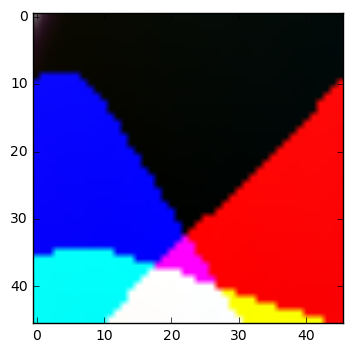

   batch: 2116 of 2116

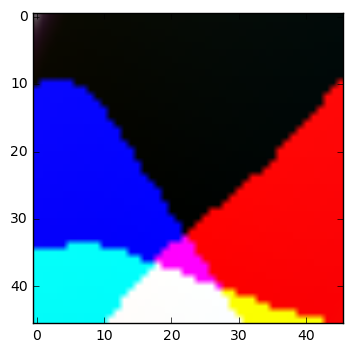

   batch: 2116 of 2116

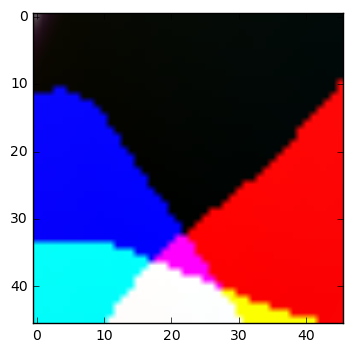

   batch: 2116 of 2116

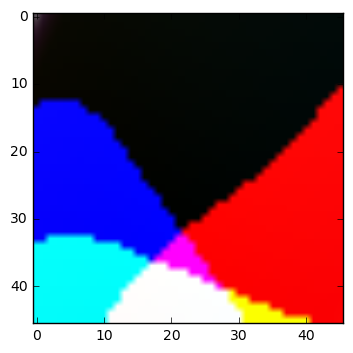

   batch: 2116 of 2116

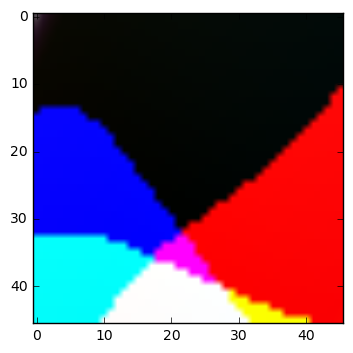

   batch: 2116 of 2116

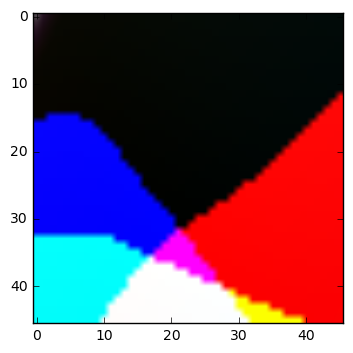

   batch: 2116 of 2116

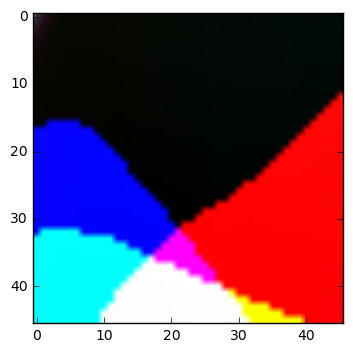

In [91]:
train_net()

In [76]:
print nn.get_output(train[0]).mean()
print nn[1].weights.max()

9.43793328582
0.990441897681


In [13]:
nn[1].bias.shape

(1,)

In [88]:
nn[1].weights.min()

-1.5359701210042991

In [89]:
img.mean()

227.14319470699434

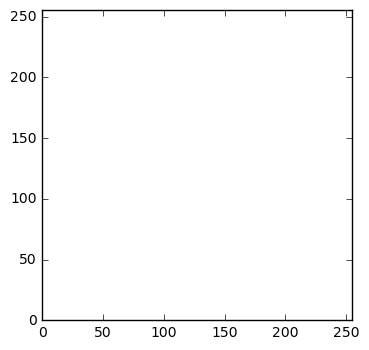

Blit = False, average FPS: 125.99


In [180]:
import matplotlib.pyplot as plt
import matplotlib.image as misc
import numpy as np
import network_module as nm


def init_train(src, norm=True, test=False):
    global train
    global img
    def loadimage(src):
        print '  loading image:', src
        img=misc.imread(src)
        # loaded data is already normalized to [0,1]
        return img

    def settrain(img, norm, test):
        train_data = np.dstack(np.meshgrid(np.arange(img.shape[0]), np.arange(img.shape[1])))\
                       .reshape(-1, 2).astype(float)
        train_label = img.reshape(-1, 3)
        
        if test:
            train_label = np.ones_like(img.reshape(-1, 3))
            train_label[:len(train_label)/2] = 0 
        if norm:
            train_data[:, 0] /= img.shape[0]
            train_data[:, 1] /= img.shape[1]
            train_label = train_label.astype(float) / 255.0
        
        return (train_data, train_label)
    
    img = loadimage(src)
    train = settrain(img, norm, test)
    return img


#########################
print 'Initializing trainset...'
init_train('gp.jpg', norm=True, test=True)
#########################


#########################
print 'Constructing network...'
# NETWORK DEFINITION
nn = nm.network(in_shape=train[0][0].shape, criterion='MSE')
nn.add_full(20, sharp=True)
nn.add_activation('relu')
nn.add_full(20, sharp=True)
nn.add_activation('relu')

nn.add_full(3)

#########################
print nn

result = []


def print_test():
    %matplotlib inline
    from IPython import display
    print '--- epoch:', nn.last_epoch, ' --- error:', nn.output.get_crit(*train)
    plt.imshow(nn.get_output(train[0]).reshape(img.shape))
    plt.show()

def train_net():
    nn.SGD(train_policy=nn.fix_epoch,
           training_set=train,
           batch=1, rate=0.0001, epoch_call_back=print_test, epoch=15)


def loadnetwork(network_source):
    global nn
    nn = nm.load(network_source)

    
def imshow(im, cmap='Greys_r', interpol='None'):

    if len(im.shape) == 3:
        for i, x in enumerate(im, 1):
            plt.subplot(1, len(im), i)
            plt.imshow(x.squeeze(), cmap=cmap, interpolation=interpol)
            plt.gca().xaxis.set_major_locator(plt.NullLocator())
    if len(im.shape) == 4:
        for irow, xrow in enumerate(im, 0):
            for icol, x in enumerate(xrow, 1):
                print '\r  ', len(im), len(xrow), irow * len(xrow) + icol
                plt.subplot(len(im), len(xrow), irow * len(xrow) + icol)
                plt.imshow(x.squeeze(), cmap=cmap, interpolation=interpol)
                plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.show()
    return im.shape


def visualise_layer(lay_ind=4, top=9, iterations=1000):
    test = nn.grad_ascent(lay_ind, train[0], top, iterations)\
             .reshape((top,) + nn[lay_ind].shape + (28, 28))
    test = np.concatenate((test, test.mean(axis=0)[np.newaxis, :]), axis=0)
    return test


def max_act(lay_ind, top=9):
    return test[0][nn.max_act(lay_ind, test[0], top)].squeeze()



Initializing trainset...
  loading image: gp.jpg
Constructing network...
Network ID: 140679996343376
Network layout:
------------------------------
	INPUT  (2,)
	   |
	   |
	  |1|
  fully connected  (20,)   ->   weights + bias: (20, 2) + (20,)
	   |
	   |
	  |2|
  activation (20,)   ->   type: relu
	   |
	   |
	  |3|
  fully connected  (20,)   ->   weights + bias: (20, 20) + (20,)
	   |
	   |
	  |4|
  activation (20,)   ->   type: relu
	   |
	   |
	  |5|
  fully connected  (3,)   ->   weights + bias: (3, 20) + (3,)
	   |
	   |
	  |6|
  	OUTPUT  (3,)   ->   CRITERION  (MSE)
------------------------------


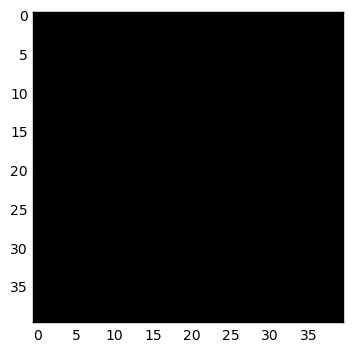

--- epoch: 0  --- error: 191205.55437


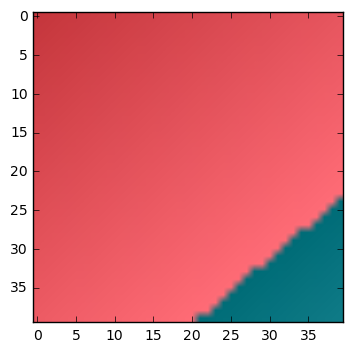

   batch: 1600 of 1600 --- epoch: 1  --- error: 364.380977903


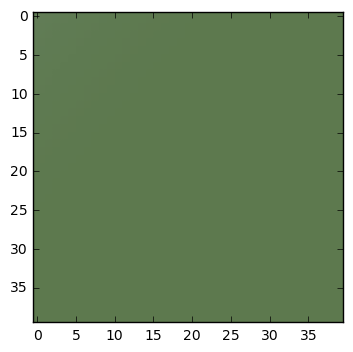

   batch: 1600 of 1600 --- epoch: 2  --- error: 263.431293942


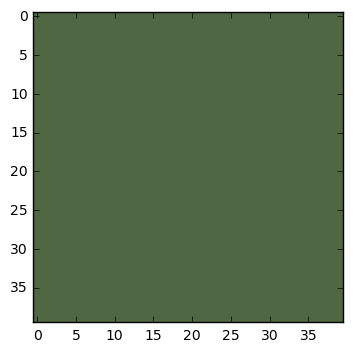

   batch: 1600 of 1600 --- epoch: 3  --- error: 191.292791575


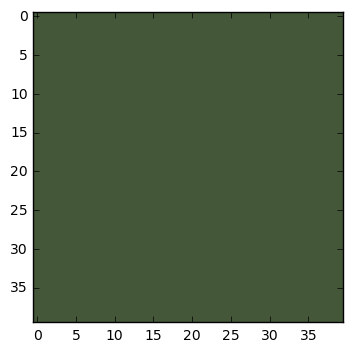

   batch: 1600 of 1600 --- epoch: 4  --- error: 138.919227455


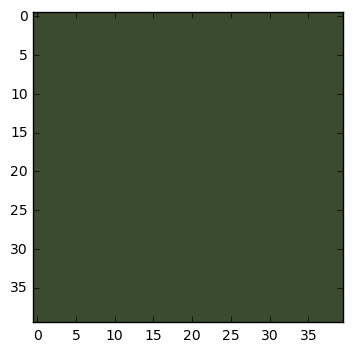

   batch: 1600 of 1600 --- epoch: 5  --- error: 100.887960562


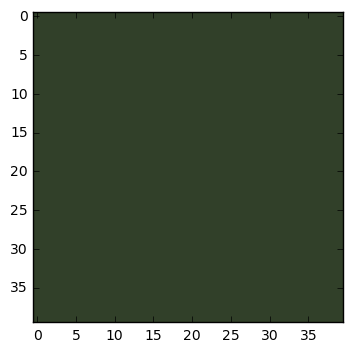

   batch: 1600 of 1600 --- epoch: 6  --- error: 73.2704974668


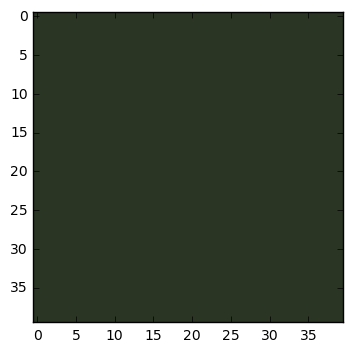

   batch: 1600 of 1600 --- epoch: 7  --- error: 53.2151007343


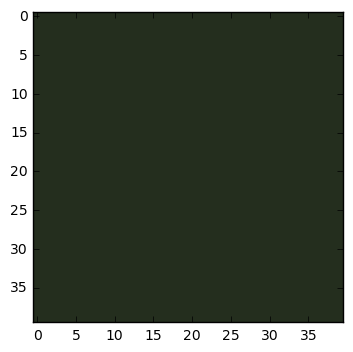

   batch: 1600 of 1600 --- epoch: 8  --- error: 38.6509291389


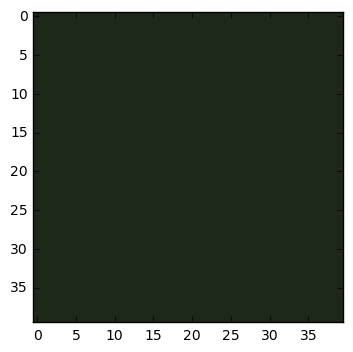

   batch: 1600 of 1600 --- epoch: 9  --- error: 28.0743178194


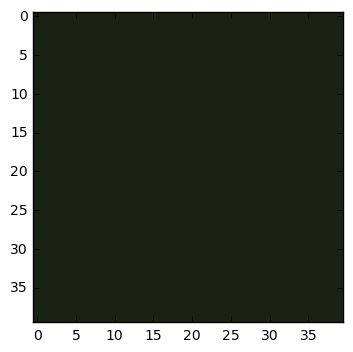

   batch: 1600 of 1600 --- epoch: 10  --- error: 20.3933769285


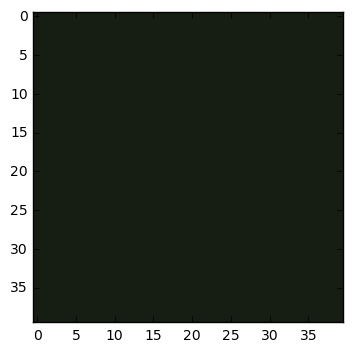

   batch: 1600 of 1600 --- epoch: 11  --- error: 14.8152202569


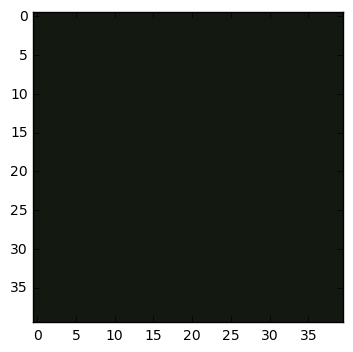

   batch: 1600 of 1600 --- epoch: 12  --- error: 10.7640768788


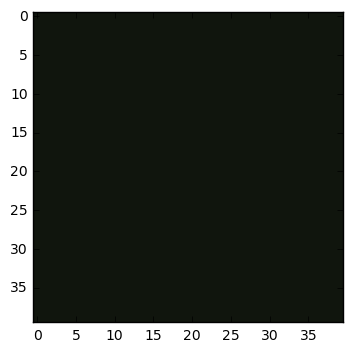

   batch: 1600 of 1600 --- epoch: 13  --- error: 7.82184889806


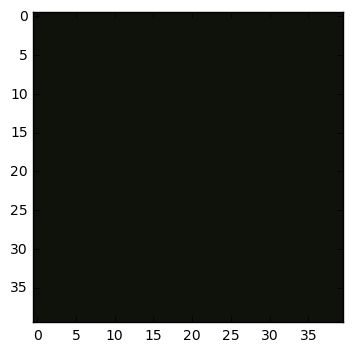

   batch: 1600 of 1600 --- epoch: 14  --- error: 5.6849259024


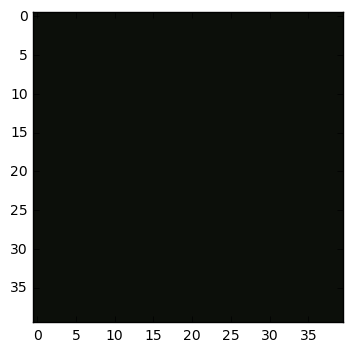

   batch: 1600 of 1600 --- epoch: 15  --- error: 4.13283317882


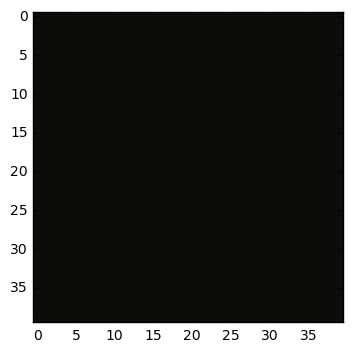

In [181]:
plt.show(plt.imshow(train[1].reshape(img.shape)))
nn.last_epoch=0
print_test()
train_net()


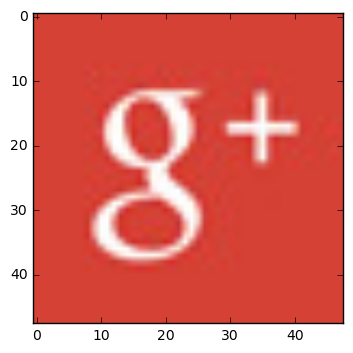

In [165]:
plt.show(plt.imshow(img))